<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Authors: [Yury Kashnitskiy](https://yorko.github.io) and [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/). Translated and edited by  [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #1. Spring 2019 <br> 

## <center>Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='../../img/plane_sunset.png' width=50%>

Prior to working on the assignment, you'd better check out the corresponding course material:
 - [Exploratory data analysis with Pandas](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic01_pandas_data_analysis/topic1_pandas_data_analysis.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
 - [Visualization: from Simple Distributions to Dimensionality Reduction](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-visual-data-analysis-in-python)
 - [Overview of Seaborn, Matplotlib and Plotly libraries](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-part-2-seaborn-and-plotly) 
 - first lectures in [this](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX) YouTube playlist 
 - you can also practice with demo assignments, which are simpler and already shared with solutions: [A1 demo](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset), [solution](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset-solution), [A2 demo](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data), [solution](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data-solution)

### Your task is to:
 1. write code and perform computations in the cells below
 2. choose answers in the [webform](https://docs.google.com/forms/d/1Q_5rY7Paed4Xc_THtrfE3OSaB3sJerYuJ7NCHtqRbKs). Solutions will be shared only with those who've filled in this form 
 3. submit answers with some email and **remember it**! This will be your ID during the course. Specify your real full name in the form as well (no nicks allowed in the final top-100 [rating](https://mlcourse.ai/rating)). If in doubt, you can re-submit the form till the deadline for A1, no problem, but stick to only one email.
 
### <center> Deadline for A1: 2019 February 24, 20:59 GMT (London time)
    
You'll get up to 12 credits for this assignment - the web-form score will be halved and rounded.

In [3]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

* Download the data [archive](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (Archived ~ 114 Mb, unzipped - ~ 690 Mb, [alternative link](https://drive.google.com/file/d/1C5nTzitvJ0ho2Crpqnghg9r2yq98Xxun/view?usp=sharing)). No need to unzip - pandas can unbzip on the fly.
* Place it in the "../../data" folder, or change the path below according to your location.
* The dataset has information about carriers and flights between US airports during the year 2008. 
* Column description is available [here](http://www.transtats.bts.gov/Fields.asp?Table_ID=236). Visit this site to find ex. meaning of flight cancellation codes.

Consider the following terms we use:
* unique flight - a record (row) in the dataset
* completed flight = flight that is not cancelled (Cancelled==0 in the dataset)
* flight code - a combination of ['UniqueCarrier','FlightNum'], i.e.  UA52
* airport code - a three letter airport alias from 'Origin or 'Dest' columns

**Reading data into memory and creating a Pandas ``DataFrame`` object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them to suitable data types.

In [4]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [5]:
%%time
# change the path if needed
path = '../../data/2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

Wall time: 1min 19s


**Check the number of rows and columns and print column names.**

In [21]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [22]:
flights_df.head(8)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,WN,378,11.0,25.0,IND,JAX,688,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1937.0,WN,509,57.0,67.0,IND,LAS,1591,0,NaN,10.0,0.0,0.0,0.0,47.0
7,2008,1,3,4,1039.0,WN,535,-18.0,-1.0,IND,LAS,1591,0,NaN,NaN,NaN,NaN,NaN,NaN


**Transpose the frame to see all features at once.**

In [23]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


**Examine data types of all features and total dataframe size in memory.**

In [24]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


**Get basic statistics of each feature.**

In [26]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


**Count unique Carriers and plot their relative share of flights:**

In [28]:
flights_df['UniqueCarrier'].nunique()

20

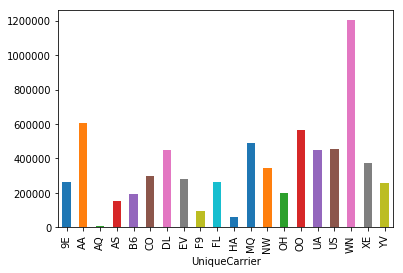

In [32]:
flights_df.groupby('UniqueCarrier').size().plot(kind= 'bar')

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [33]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(
    ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**

In [34]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

**Number of flights by days of week and months:**

In [35]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**It can also be handy to color such tables in order to easily notice outliers:**

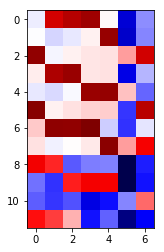

In [36]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

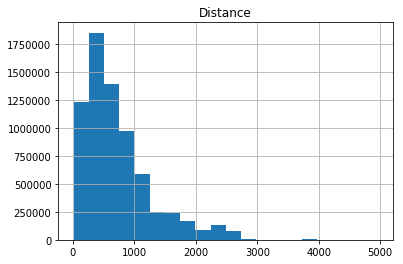

In [37]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [38]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])
flights_df['Date'].head()

0   2008-01-03
1   2008-01-03
2   2008-01-03
3   2008-01-03
4   2008-01-03
Name: Date, dtype: datetime64[ns]

In [39]:
num_flights_by_date = flights_df.groupby('Date').size()

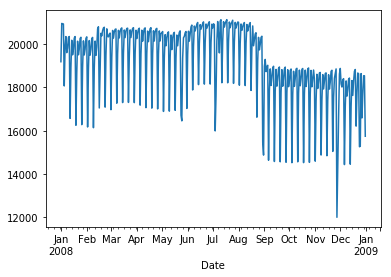

In [40]:
num_flights_by_date.plot();

**Do you see a weekly pattern above? And below?**

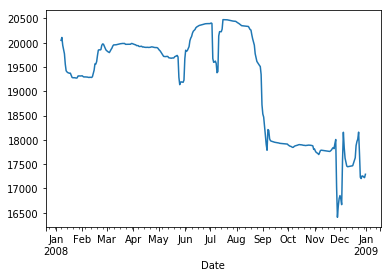

In [41]:
num_flights_by_date.rolling(window=7).mean().plot();

### Now it's your turn. Answer the questions below.

**1. How many unique carriers are there in our dataset?**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q1-5__*

- 10
- 15
- 20
- 25 

In [42]:
flights_df['UniqueCarrier'].nunique()

20

**2. We have  both cancelled and completed flights in the datset. Check if there are more completed or cancelled flights. What is the difference?** <br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q1-5__*

*Hint:* Take a look at *Cancelled* to see the categories and *FlightNum* column to calculate unique flights for each category.

- Cancelled overweights completed by 329 flights
- Completed overweights cancelled by 6734860 flights
- Cancelled overweights completed by 671 flights
- Completed overweights cancelled by 11088967 flights

In [43]:
flights_df.loc[flights_df.Cancelled == 0].Cancelled.count() - flights_df.loc[flights_df.Cancelled == 1].Cancelled.count()

#- flights_df[flights_df.Cancelled == 0,[['Cancelled','FlightNum']]].count()
#flights_df.FlightNum.nunique()

6734860

**3. Find a flight with the longest departure delays and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q1-5__*

- yes, ATL
- yes, HNL
- yes, MSP
- no

In [49]:
flights_df.ArrDelay.sort_values(ascending = False)[:1], flights_df.DepDelay.sort_values(ascending = False)[:1]
flights_df.iloc[[1018798, 2235378]]

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
1018798,2008,2,3,7,1117.0,NW,808,2460.0,2456.0,HNL,MSP,3972,0,NaN,1455.0,0.0,4.0,0.0,1002.0,2008-02-03
2235378,2008,4,10,4,724.0,NW,1699,2452.0,2468.0,CLT,MSP,930,0,NaN,2436.0,0.0,0.0,0.0,17.0,2008-04-10


**4. Find the carrier that has the greatest number of cancelled flights.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q1-5__*
- AA
- MQ
- WN
- CO 

In [53]:
flights_df.loc[flights_df.Cancelled== 1].UniqueCarrier.value_counts()

MQ    18331
AA    17440
OO    12436
WN    12389
UA    10541
XE     9992
YV     9219
9E     7100
DL     6813
US     6582
OH     6462
EV     5026
CO     3702
B6     3205
NW     2906
FL     2236
AS     2139
HA      570
F9      303
AQ       42
Name: UniqueCarrier, dtype: int64

**5. Let's examine departure time (*DepTime* column). Let's see how all flights are distributed by time. For simplicity, consider distribution by hour. Which hour has the highest percentage of flights?**<br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q1-5__*

*Hint:* Check time format [here](https://www.transtats.bts.gov/Fields.asp?Table_ID=236).

- 1 am 
- 6 am
- 11 am  
- 3 pm 

8.0     449224
6.0     446737
11.0    444702
7.0     436700
13.0    435917
9.0     434850
16.0    434017
17.0    432488
10.0    431460
12.0    424249
14.0    416875
15.0    411126
18.0    400784
19.0    387288
20.0    285991
21.0    254850
5.0     148167
Name: DepTime1, dtype: int64


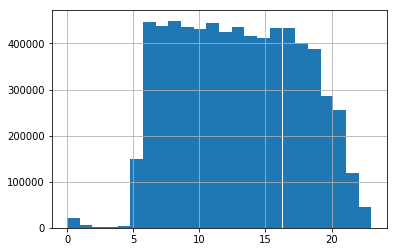

In [193]:
flights_df['DepTime1'] = flights_df['DepTime'] // 100
flights_df['DepTime1'].replace(to_replace=24, value=0, inplace=True)
print(flights_df['DepTime1'].value_counts()[:5])
flights_df[flights_df.DepTime1.notnull()].DepTime1.hist(bins=24)

**6. OK, now let's examine cancelled flight distribution by time. Which hour has the least percentage of cancelled flights?**<br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q6-10__*

- 2 am
- 9 pm  
- 8 am  
- 3 am 

7.0     83
21.0    82
19.0    81
6.0     80
8.0     79
16.0    73
17.0    73
15.0    73
18.0    66
11.0    59
10.0    57
14.0    57
22.0    57
9.0     56
12.0    53
20.0    51
13.0    47
23.0    24
5.0     24
0.0      7
1.0      4
4.0      1
2.0      1
Name: DepTime1, dtype: int64


F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


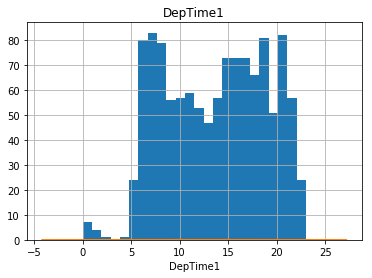

In [194]:
canc_df = flights_df.loc[flights_df.Cancelled == 1 & flights_df.DepTime1.notnull()]
canc_df.hist('DepTime1', bins = 24)
print(canc_df['DepTime1'].value_counts())
sns.distplot(canc_df.DepTime1)

**7. Is there any hour that didn't have any cancelled flights at all? Check all that apply.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q6-10__*

- 3
- 19
- 22
- 4

In [195]:
pd.crosstab(flights_df.DepTime1, flights_df.Cancelled).T

DepTime1,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Cancelled,,,,,,,,,,,,,,,,,,,,,
0,20361,5857,1850,833,3389,148143,446657,436617,449145,434794,...,416818,411053,433944,432415,400718,387207,285940,254768,119594,46079
1,7,4,1,0,1,24,80,83,79,56,...,57,73,73,73,66,81,51,82,57,24


**8. Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.**<br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q6-10__*

*Hint:* Consider only *completed* flights.

- 20
- 21
- 9
- 6

In [197]:
flights_df.loc[flights_df.Cancelled == 0].DepTime1.value_counts()
#sns.distplot(flights_df.loc[flights_df.Cancelled == 0].DepTime1)

8.0     449145
6.0     446657
11.0    444643
7.0     436617
13.0    435870
9.0     434794
16.0    433944
17.0    432415
10.0    431403
12.0    424196
14.0    416818
15.0    411053
18.0    400718
19.0    387207
20.0    285940
21.0    254768
5.0     148143
22.0    119594
23.0     46079
0.0      20361
1.0       5857
4.0       3389
2.0       1850
3.0        833
Name: DepTime1, dtype: int64

In [47]:
**9. Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?**<br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q6-10__*

*Hint:* Consider only *completed* flights.

- no, there are no such cases
- yes, at 5-7 am
- yes, at 9-11 am
- yes, at 1-3 pm

SyntaxError: invalid syntax (<ipython-input-47-03861f0c1df6>, line 1)

In [198]:
flights_df.loc[flights_df.Cancelled== 0].groupby(['DepTime1'])['DepDelay'].mean()

DepTime1
0.0      70.750000
1.0     111.812500
2.0     122.562500
3.0      95.812500
4.0       3.375000
5.0      -4.253906
6.0      -1.629883
7.0       0.102539
8.0       1.760742
9.0       3.753906
10.0      5.460938
11.0      6.683594
12.0      7.902344
13.0      8.812500
14.0     10.351562
15.0     11.875000
16.0     11.882812
17.0     13.210938
18.0     15.343750
19.0     16.875000
20.0     22.781250
21.0     23.031250
22.0     38.031250
23.0     60.000000
Name: DepDelay, dtype: float16

**10. Considering only the completed flights by the carrier, that you have found in Question 3, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?**<br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q6-10__*

*Hint:* Consider *all* flights.

- at noon
- at 6 am
- at 8 pm
- at 9 am

In [199]:
flights_df.loc[(flights_df.UniqueCarrier == 'MQ')].DepTime1.value_counts()

10.0    33073
9.0     32609
11.0    31872
13.0    31298
16.0    31294
6.0     30987
15.0    30915
14.0    30158
12.0    30047
7.0     29854
18.0    29371
17.0    28874
8.0     28770
19.0    25505
20.0    18672
5.0     12733
21.0    12098
22.0     3474
23.0      744
0.0       165
1.0        15
2.0         4
Name: DepTime1, dtype: int64

**11. Find top-10 carriers in terms of the number of *completed* flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q11-15__*

- DL
- AA
- OO
- EV

In [200]:
flights_df.loc[flights_df.Cancelled == 0].UniqueCarrier.value_counts()[:10]

WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
Name: UniqueCarrier, dtype: int64

**12. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q11-15__*

- Carrier
- Weather conditions
- National Air System
- Security reasons

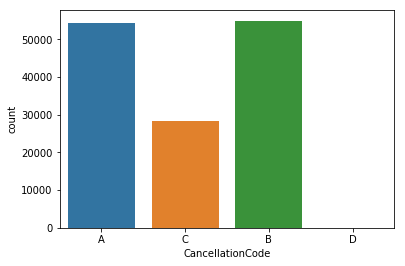

In [201]:
flights_df.CancellationCode.value_counts()
sns.countplot(flights_df.CancellationCode)

**13. Which route is the most frequent, in terms of the number of flights?**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q11-15__*

*Hint: Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes)*

 - New-York – Washington (JFK-IAD)
 - San-Francisco – Los-Angeles (LAX-SFO)
 - San-Jose – Dallas (SJC-DFW)
 - New-York – San-Francisco (JFK-SFO)

In [202]:
flights_df['Route'] = flights_df.Origin + '-'+ flights_df.Dest
flights_df.Route.value_counts()[:10]

SFO-LAX    13788
LAX-SFO    13390
OGG-HNL    12383
LGA-BOS    12035
BOS-LGA    12029
HNL-OGG    12014
LAX-LAS    11773
LAS-LAX    11729
LAX-SAN    11257
SAN-LAX    11224
Name: Route, dtype: int64

**14. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q11-15__*

_Hint_: consider only positive delays

- 449 
- 539 
- 549 
- 668

In [203]:
routes = flights_df.loc[flights_df.DepDelay > 0].Route.value_counts()[:5].index
routes


Index(['LAX-SFO', 'DAL-HOU', 'SFO-LAX', 'ORD-LGA', 'HOU-DAL'], dtype='object')

In [204]:
flights_df.loc[(flights_df.Route.isin(routes)) & (flights_df.WeatherDelay>0)].shape

(668, 22)

**15. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q11-15__*

**Choose all correct statements:**
 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

In [126]:
flights_df['DepTimes'] = flights_df.DepTime / 100
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime1,Route,DepTimes
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,...,0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,IAD-TPA,20.031250
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,...,0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,IAD-TPA,7.539062
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,...,0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,IND-BWI,6.281250
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,...,0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,IND-BWI,9.257812
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,...,0,NaN,2.0,0.0,0.0,0.0,32.0,18.0,IND-BWI,18.296875


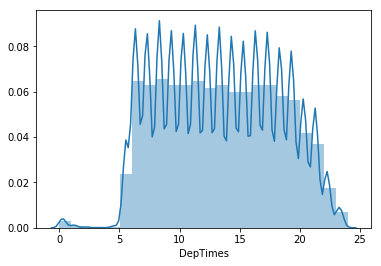

In [127]:
sns.distplot(flights_df[flights_df.DepTimes.notnull()].DepTimes, bins =24)

**16. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q16-20__*

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days).
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.

_Hint_: Look for official meteorological winter months for the Nothern Hemisphsere.

In [150]:
#flights_df.DayofMonth.hist(bins=31)
flights_df.Month.value_counts()


7     627931
3     616090
8     612279
6     608665
5     606293
1     605765
4     598126
2     569236
10    556205
12    544958
9     540908
11    523272
Name: Month, dtype: int64

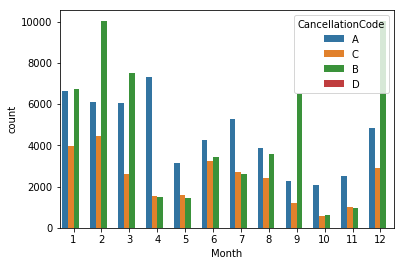

In [166]:
sns.countplot(x = 'Month', data = flights_df, hue = 'CancellationCode')

**18. Which month has the greatest number of cancellations due to Carrier?** 

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q15-20__*

- May
- January
- September
- April

In [155]:
flights_df[(flights_df.CancellationCode == 'A')].Month.value_counts()

4     7312
1     6635
2     6090
3     6038
7     5292
12    4850
6     4251
8     3852
5     3157
11    2510
9     2246
10    2097
Name: Month, dtype: int64

**19. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q15-20__*

- 9E
- EV
- HA
- AA

In [168]:
flights_df[(flights_df.CancellationCode == 'A') & (flights_df.Month == 4)].UniqueCarrier.value_counts()

AA    3696
WN     533
UA     494
YV     454
9E     391
US     335
OO     298
MQ     283
DL     226
AS     135
NW     122
FL      81
OH      76
CO      50
B6      43
XE      30
HA      29
EV      29
F9       7
Name: UniqueCarrier, dtype: int64

**20. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
([Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile).**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q15-20__*

- EV
- OO
- AA
- AQ

In [186]:
df = flights_df.loc[(flights_df.ArrDelay > 0) & (flights_df.DepDelay > 0)]
df.groupby('UniqueCarrier').ArrDelay.median().sort_values()[:5], df.groupby('UniqueCarrier').DepDelay.median().sort_values()[:5]
df.ArrDelay.quantile(0.95), df.DepDelay.quantile(0.95)
df = df.loc[(flights_df.ArrDelay < 145) & (flights_df.DepDelay < 139)]
df.groupby('UniqueCarrier').ArrDelay.median().sort_values()[:5], df.groupby('UniqueCarrier').DepDelay.median().sort_values()[:5]


(UniqueCarrier
 AQ    10.0
 HA    11.0
 WN    15.0
 F9    15.0
 AS    20.0
 Name: ArrDelay, dtype: float16, UniqueCarrier
 HA     8.0
 AQ     9.0
 F9    13.0
 DL    16.0
 NW    17.0
 Name: DepDelay, dtype: float16)

In [182]:
sns.boxplot?

AxesSubplot(0.125,0.125;0.775x0.755)


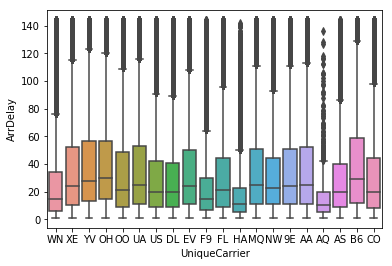

In [189]:
print(sns.boxplot(x = 'UniqueCarrier', y = 'ArrDelay', data = df))


AxesSubplot(0.125,0.125;0.775x0.755)


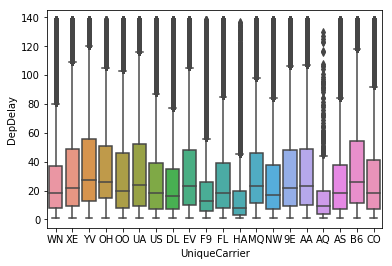

In [190]:
print(sns.boxplot(x = 'UniqueCarrier', y = 'DepDelay', data = df))